# Experimentation Tutorial

### ✅ Step 1: Get a Public Experiment Dataset of Sufficient Size

Let’s use the “Cookie Cats” A/B testing dataset, which simulates a real-world mobile game experiment. It includes test and control groups and relevant KPIs like retention and spending behavior.

You can download it from Kaggle here:
https://www.kaggle.com/datasets/marwandiab/cookie-catsdataset

#### Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the CSV file
df = pd.read_csv('cookie_cats.csv')
display(df)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### ✅ Step 2: Explore the Data to Find Any Existing Relationships

We’ll:
* Check group sizes
* Visualize distributions
* Look at retention and game rounds by group

In [6]:
# group size balances
df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

/var/folders/kj/43wdr9t108505m0kvphrlw2r0000gn/T/ipykernel_86441/1618388107.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Version')


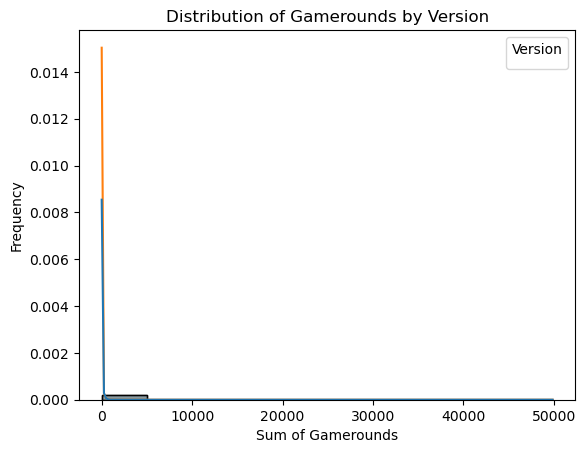

In [12]:
sns.histplot(data=df, x='sum_gamerounds', hue='version', kde=True, stat='density', common_norm=False, bins=10)
plt.title('Distribution of Gamerounds by Version')
plt.xlabel('Sum of Gamerounds')
plt.ylabel('Frequency')
plt.legend(title='Version')
plt.show()

In [16]:
print(df['sum_gamerounds'].skew())

185.43631284312502


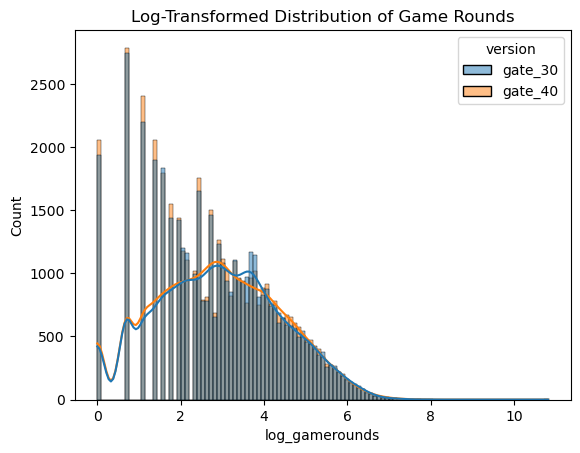

In [17]:
import numpy as np

df['log_gamerounds'] = np.log1p(df['sum_gamerounds'])  # log(1 + x) to avoid log(0)

sns.histplot(data=df, x='log_gamerounds', hue='version', kde=True)
plt.title('Log-Transformed Distribution of Game Rounds')
plt.show()

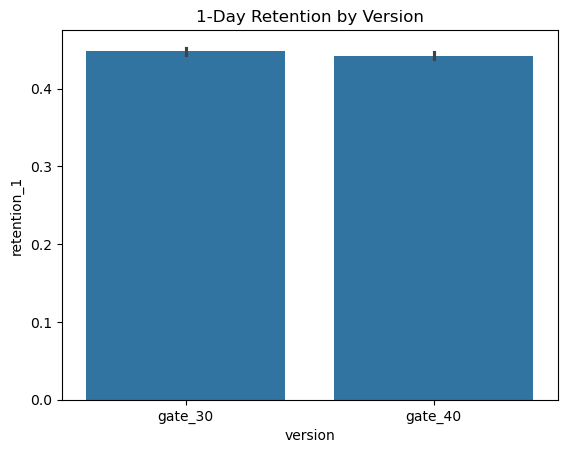

In [13]:
# Bar plot for 1-day retention
sns.barplot(data=df, x='version', y='retention_1')
plt.title('1-Day Retention by Version')
plt.show()

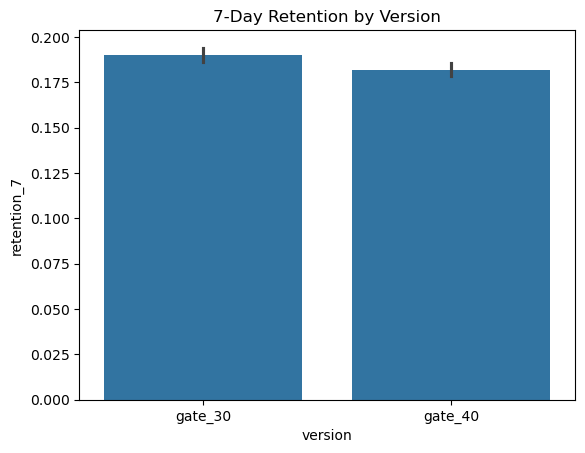

In [14]:
sns.barplot(data=df, x='version', y='retention_7')
plt.title('7-Day Retention by Version')
plt.show()

In [15]:
print(df.corr(numeric_only=True))

                  userid  sum_gamerounds  retention_1  retention_7
userid          1.000000        0.001847    -0.002596    -0.002636
sum_gamerounds  0.001847        1.000000     0.197603     0.279288
retention_1    -0.002596        0.197603     1.000000     0.327401
retention_7    -0.002636        0.279288     0.327401     1.000000
